In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np

In [39]:
def read_hdf5_file(file_path):
    with h5py.File(file_path, 'r') as f:
        H = np.array(f['/H'])
        superadiabacicity_parameter = np.array(f['/superadiabacicity_parameter'])
        grad_s0 = np.array(f['/grad_s0'])
        r_over_R = np.array(f['/r_over_R'])
        c_s = np.array(f['/c_s'])
        Gamma_1 = np.array(f['/Gamma_1'])
        T0 = np.array(f['/T0'])
        rho0 = np.array(f['/rho0'])
        p0 = np.array(f['/p0'])
        g = np.array(f['/g'])

    return H, superadiabacicity_parameter, grad_s0, r_over_R, c_s, Gamma_1, T0, rho0, p0, g

H, superadiabacicity_parameter, grad_s0, r_over_R, c_s, Gamma_1, T0, rho0, p0, g =\
    read_hdf5_file("../../data/solar_s_background_2.h5")

In [43]:
np.where(np.abs(r_over_R-1)<1e-2)

(array([], dtype=int64),)

In [38]:
r_over_R.shape

(200,)

In [41]:
g[-1]

30325.67080840477

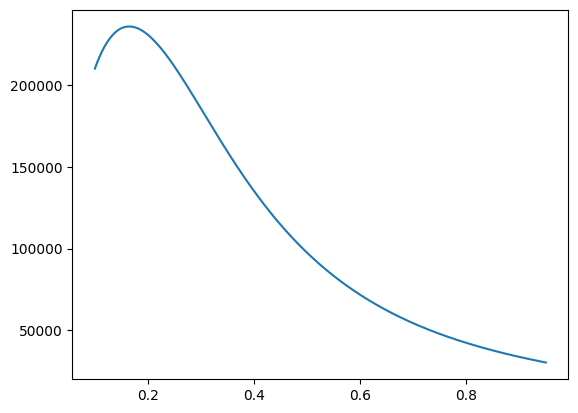

In [40]:
plt.plot(r_over_R, g)

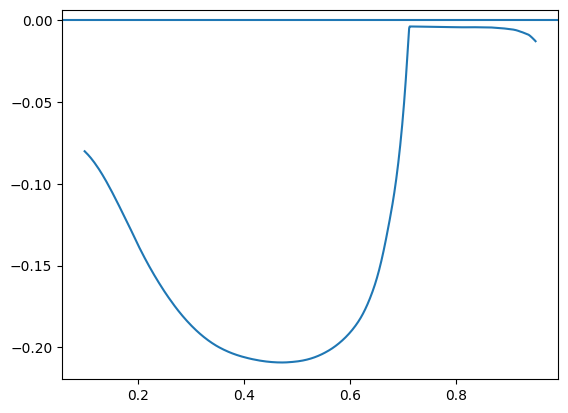

In [31]:
plt.plot(r_over_R, superadiabacicity_parameter)
plt.axhline(0,0,1)

In [3]:
def read_hdf5_file_raw(file_path):
    with h5py.File(file_path, 'r') as f:
        r_over_R = np.array(f['/r_over_R'])
        c_s = np.array(f['/c_s'])
        Gamma_1 = np.array(f['/Gamma_1'])
        T0 = np.array(f['/T'])
        rho0 = np.array(f['/rho'])
        p0 = np.array(f['/p'])

    return r_over_R, c_s, Gamma_1, T0, rho0, p0

r_over_R_raw, c_s_raw, Gamma_1_raw, T0_raw, rho0_raw, p0_raw =\
    read_hdf5_file_raw("../../additional_files/solar_s.h5")

In [8]:
R_sun = 6.957e10
#H_on_interpolated = - (np.roll(r_over_R,-1)-r_over_R)*R_sun * p0 / (np.roll(p0,-1)-p0)
#H_on_interpolated = - (np.roll(r_over_R,-1)-r_over_R)*R_sun / (np.roll(np.log(p0),-1)-np.log(p0))
H_on_raw_data = - (np.roll(r_over_R_raw,-1)-r_over_R_raw)*R_sun * p0_raw / (np.roll(p0_raw,-1)-p0_raw)

In [ ]:
plt.plot(r_over_R[:-1], H_on_interpolated[:-1], label="Interpolated data", marker="o", color="black")
plt.plot(r_over_R_raw[1000:2000], H_on_raw_data[1000:2000], label="Raw data", linestyle="-", marker="o", color="red")
plt.xlabel("R/R$_*$")
plt.ylabel("Pressure scale height")
plt.xlim(0.44,0.445)
plt.legend()

In [ ]:
plt.semilogy(r_over_R[:-1], p0[:-1], label="Interpolated data", marker="o", color="black")
plt.semilogy(r_over_R_raw[1000:2000], p0_raw[1000:2000], label="Raw data", linestyle="-", marker="o", color="red")
plt.xlabel("R/R$_*$")
plt.ylabel("Pressure")
plt.xlim(0.44,0.445)
plt.legend()

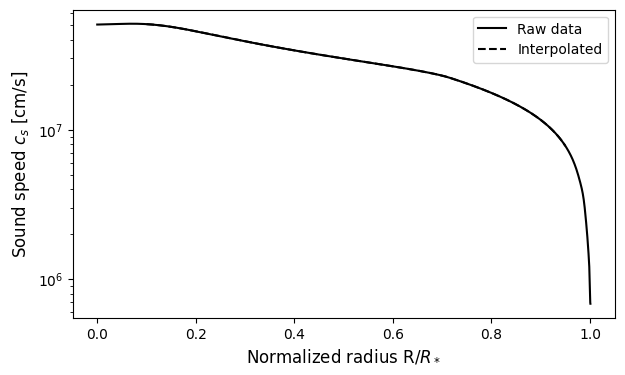

In [4]:
fig, ax = plt.subplots(figsize=(7,4))

ax.semilogy(r_over_R_raw, c_s_raw, color="black", label="Raw data")
ax.semilogy(r_over_R, c_s, color="black", label="Interpolated", linestyle="--")
ax.set_xlabel("Normalized radius R/$R_*$", fontsize=12)
ax.set_ylabel("Sound speed $c_s$ [cm/s]", fontsize=12)
ax.legend()
plt.show()

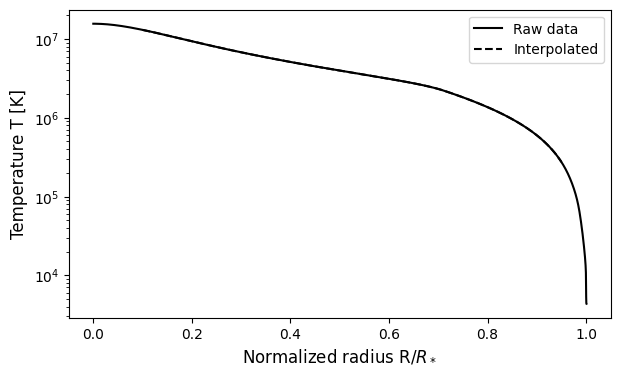

In [5]:
fig, ax = plt.subplots(figsize=(7,4))

ax.semilogy(r_over_R_raw, T0_raw, color="black", label="Raw data")
ax.semilogy(r_over_R, T0, color="black", label="Interpolated", linestyle="--")
ax.set_xlabel("Normalized radius R/$R_*$", fontsize=12)
ax.set_ylabel("Temperature T [K]", fontsize=12)
ax.legend()
plt.show()

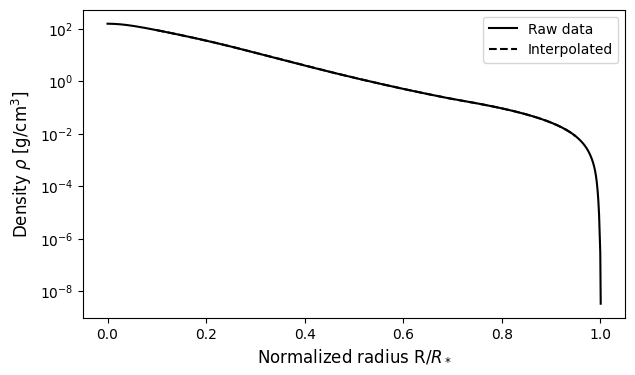

In [6]:
fig, ax = plt.subplots(figsize=(7,4))

ax.semilogy(r_over_R_raw, rho0_raw, color="black", label="Raw data")
ax.semilogy(r_over_R, rho0, color="black", label="Interpolated", linestyle="--")
ax.set_xlabel("Normalized radius R/$R_*$", fontsize=12)
ax.set_ylabel(r"Density $\rho$ [g/cm$^3$]", fontsize=12)
ax.legend()
plt.show()

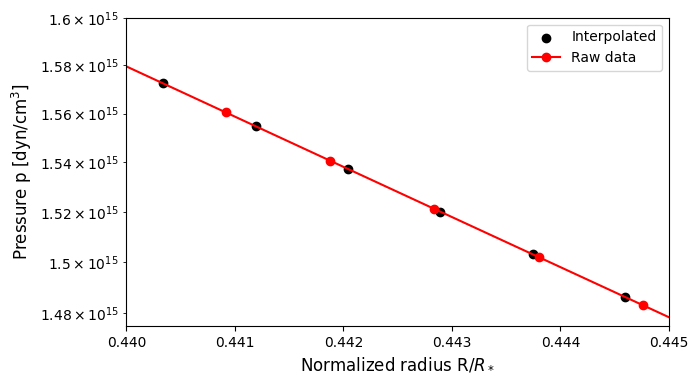

In [7]:
fig, ax = plt.subplots(figsize=(7,4))

ax.scatter(r_over_R, p0, color="black", label="Interpolated")
ax.semilogy(r_over_R_raw, p0_raw, color="red", label="Raw data", linestyle="-", marker="o")
ax.set_xlabel("Normalized radius R/$R_*$", fontsize=12)
ax.set_ylabel(r"Pressure p [dyn/cm$^3$]", fontsize=12)
ax.set_xlim(0.44,0.445)
ax.set_ylim(1.475e15,1.6e15)
ax.legend()
plt.show()

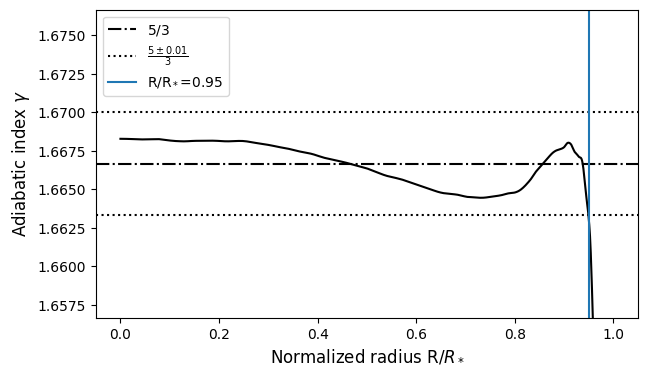

In [9]:
fig, ax = plt.subplots(figsize=(7,4))

ax.plot(r_over_R_raw, Gamma_1_raw, color="black")

ax.axhline(5/3, 0, 1, color="black", linestyle="-.", label="$5/3$")
ax.axhline(5/3+0.01/3, 0, 1, color="black", linestyle=":", label=r"$\frac{5\pm0.01}{3}$")
ax.axhline(5/3-0.01/3, 0, 1, color="black", linestyle=":")
ax.axvline(0.95, label="R/R$_*$=0.95")
ax.set_xlabel("Normalized radius R/$R_*$", fontsize=12)
ax.set_ylabel(r"Adiabatic index $\gamma$", fontsize=12)
ax.set_ylim(5/3-0.01, 5/3+0.01)
ax.legend()
plt.show()

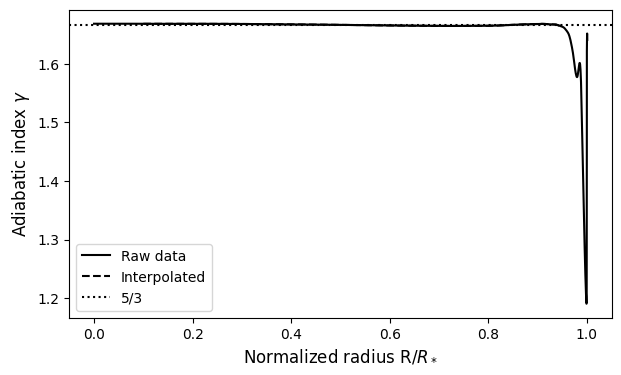

In [10]:
fig, ax = plt.subplots(figsize=(7,4))

ax.plot(r_over_R_raw, Gamma_1_raw, color="black", label="Raw data")
ax.plot(r_over_R, Gamma_1, color="black", label="Interpolated", linestyle="--")
ax.axhline(5/3, 0, 1, color="black", linestyle=":", label="5/3")
ax.set_xlabel("Normalized radius R/$R_*$", fontsize=12)
ax.set_ylabel(r"Adiabatic index $\gamma$", fontsize=12)
ax.legend()
plt.show()

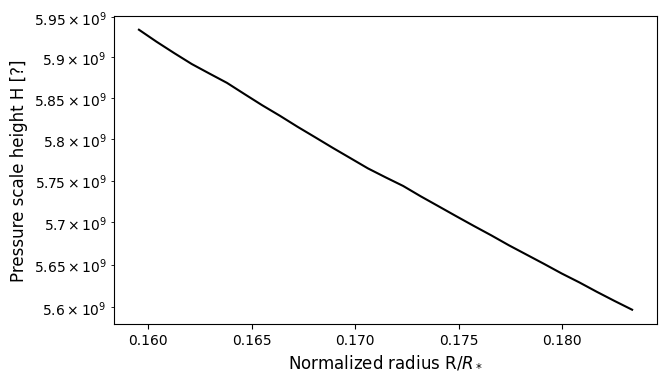

In [11]:
fig, ax = plt.subplots(figsize=(7,4))

ax.semilogy(r_over_R[70:99], H[70:99], color="black")
ax.set_xlabel("Normalized radius R/$R_*$", fontsize=12)
ax.set_ylabel(r"Pressure scale height H [?]", fontsize=12)
plt.show()

In [ ]:
r_over_R[-1]

In [ ]:
H[0]

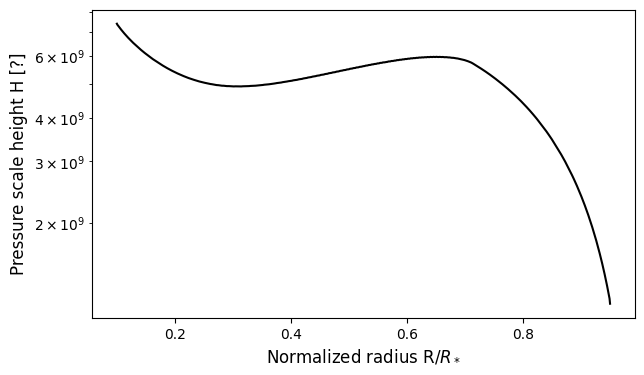

In [20]:
fig, ax = plt.subplots(figsize=(7,4))

ax.semilogy(r_over_R, H, color="black")
#ax.semilogy(r_over_R_raw[:-1], H_on_raw_data[:-1], color="red",linestyle=":")
ax.set_xlabel("Normalized radius R/$R_*$", fontsize=12)
ax.set_ylabel(r"Pressure scale height H [?]", fontsize=12)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))

ax.plot(r_over_R, superadiabacicity_parameter, color="black")
ax.axhline(0,0,1, color="black", linestyle="--")
ax.set_xlabel("Normalized radius R/$R_*$", fontsize=12)
ax.set_ylabel(r"Superadiabatic parameter $\Delta\nabla$ [?]", fontsize=12)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))

ax.semilogy(r_over_R, s0, color="black")
ax.set_xlabel("Normalized radius R/$R_*$", fontsize=12)
ax.set_ylabel(r"Entropy s [cal/Kmol]", fontsize=12)
plt.show()

$$
\delta_p = (\partial \ln \rho / \ln T)_p \Leftrightarrow \delta_p = \frac{T}{\rho}\frac{\partial\rho}{\partial T}
$$

$$
c_p = r_*/(1-1/\gamma)
$$

$$
r_* = p/(\rho T)
$$

In [ ]:
nz = len(r_over_R_raw)
delta_p = np.zeros(len(r_over_R_raw))

delta_p[0] = T0_raw[0]/rho0_raw[0] * (rho0_raw[1]-rho0_raw[0])/(T0_raw[1]-T0_raw[0])
delta_p[nz-1] = T0_raw[nz-1]/rho0_raw[nz-1] * (rho0_raw[nz-1]-rho0_raw[nz-2])/(T0_raw[nz-1]-T0_raw[nz-2])

for i in range(1,nz-1):
    delta_p[i] = T0_raw[i]/rho0_raw[i] * (rho0_raw[i+1]-rho0_raw[i-1])/(T0_raw[i+1]-T0_raw[i-1])

In [ ]:
r_star = p0_raw/(rho0_raw*T0_raw)
c_p = r_star / (1-1/Gamma_1_raw)

In [ ]:
delta_p = 1
del_ad = p0_raw * delta_p/(T0_raw*rho0_raw*c_p)

In [ ]:
plt.plot(r_over_R_raw, del_ad)
plt.ylim(0,0.5)
plt.xlabel(r"R/R$_*$")
plt.ylabel(r"$\nabla_{ad}$")